In [1]:
# Importar librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Definir una semilla para reproducibilidad
seed = 42

# Cargar el conjunto de datos de vivienda en Boston
from sklearn.datasets import fetch_openml
# Utilizamos fetch_openml para cargar el dataset
boston = fetch_openml(data_id=531)
X, y = boston.data, boston.target
features = boston.feature_names
# Mostrar nombres de características, la variable objetivo y la forma de los datos
print('Nombres de las características: {}'.format(features))
print('\nNombre de la variable objetivo: {}'.format(boston.target_names))
print('\nForma de los datos: {} {}'.format(X.shape, y.shape))

Nombres de las características: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

Nombre de la variable objetivo: ['MEDV']

Forma de los datos: (506, 13) (506,)


In [2]:
# División del conjunto en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Convertimos X a un array NumPy de tipo flotante para evitar problemas de tipo
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)
# Dividir el conjunto en datos de entrenamiento (10%) y prueba (90%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=seed)
# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print('Dimensiones de X_train: {}, X_test: {}'.format(X_train.shape, X_test.shape))
print('Dimensiones de y_train: {}, y_test: {}'.format(y_train.shape, y_test.shape))

Dimensiones de X_train: (50, 13), X_test: (456, 13)
Dimensiones de y_train: (50,), y_test: (456,)


In [3]:
# Inicializar y ajustar el modelo de regresión lineal múltiple
lr = LinearRegression() # Instancia del modelo de regresión lineal
lr.fit(X_train, y_train) # Entrenamiento del modelo con los datos de entrenamiento
# Obtener los coeficientes de regresión
coefs_lr = pd.Series(np.abs(lr.coef_), index=features).sort_values()  # Valores absolutos para ordenarlos
# Realizar predicciones sobre el conjunto de prueba
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train) # Predicciones sobre el conjunto de entrenamiento
# Evaluar el modelo utilizando métricas de desempeño
mse_train = mean_squared_error(y_train, y_train_pred) # Error cuadrático medio para entrenamiento
mse_test = mean_squared_error(y_test, y_test_pred) # Error cuadrático medio para prueba
r2score_train = lr.score(X_train, y_train) # Puntaje R^2 en entrenamiento
r2score_test = lr.score(X_test, y_test) # Puntaje R^2 en prueba
# Mostrar el intercepto y los coeficientes del modelo
print('Intercepto y coeficientes del modelo:\n \nIntercepto: {}\n \nCoeficientes: {}'.format(lr.intercept_, lr.coef_))
# Mostrar el error cuadrático medio y el puntaje R^2
print('\nError Cuadrático Medio (ECM) en entrenamiento: {}'.format(mse_train))
print('Error Cuadrático Medio (ECM) en prueba: {}'.format(mse_test))
print('\nPuntaje R^2 en entrenamiento: {}'.format(r2score_train))
print('Puntaje R^2 en prueba: {}'.format(r2score_test))

Intercepto y coeficientes del modelo:
 
Intercepto: 29.28982588278542
 
Coeficientes: [-3.52276440e-02  3.74189992e-02 -1.53911832e-01  7.75772273e+00
 -1.27186309e+01  4.51717658e+00 -6.89587505e-02 -1.74595447e+00
  3.47162018e-01 -1.10563851e-02 -7.98303460e-01  8.79070755e-03
 -2.34221766e-01]

Error Cuadrático Medio (ECM) en entrenamiento: 19.861052089005906
Error Cuadrático Medio (ECM) en prueba: 28.01412571526917

Puntaje R^2 en entrenamiento: 0.700743261188567
Puntaje R^2 en prueba: 0.6757580265626979


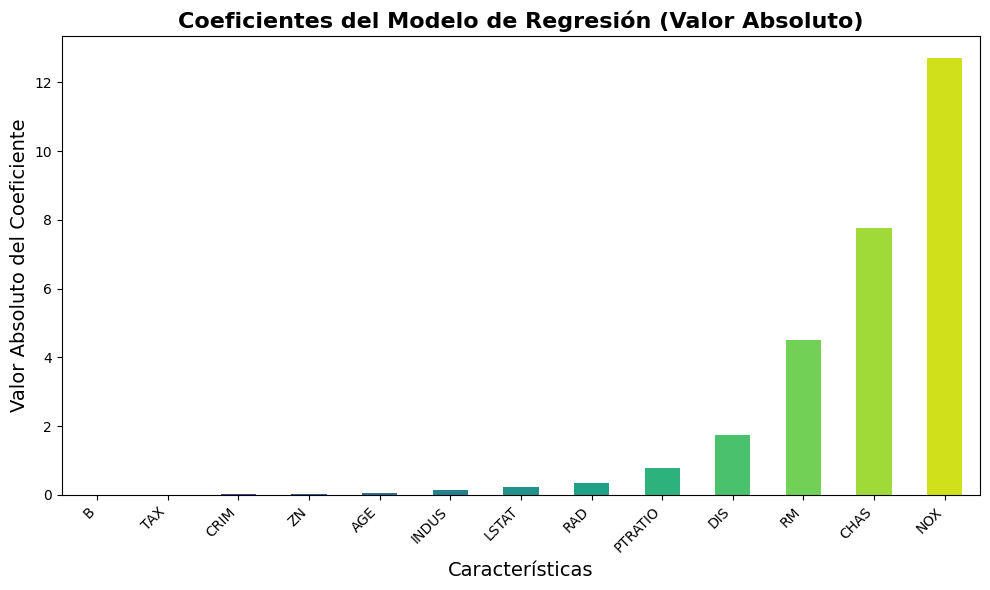

In [4]:
# Crear la gráfica de barras ordenada por valores absolutos de los coeficientes
plt.figure(figsize=(10, 6))
# Ordenar los coeficientes de menor a mayor (invirtiendo el orden)
coefs_lr.sort_values(ascending=True).plot(kind='bar', color=sns.color_palette("viridis", n_colors=len(coefs_lr)))
# Título y etiquetas de ejes
plt.title('Coeficientes del Modelo de Regresión (Valor Absoluto)', fontsize=16, weight='bold')
plt.xlabel('Características', fontsize=14)
plt.ylabel('Valor Absoluto del Coeficiente', fontsize=14)
# Rotación y alineación de las etiquetas para mejor legibilidad
plt.xticks(rotation=45, ha='right')
# Mostrar la gráfica
plt.tight_layout() # Ajustar el espaciado para evitar solapamiento de elementos
plt.show()


Intercepto del modelo: 29.192905256841595

Coeficientes del modelo Ridge:
 [ 2.08447424e-03  4.30036834e-02 -2.31040992e-01  6.08837583e+00
 -1.64018349e+00  3.88967991e+00 -8.14349726e-02 -1.70761994e+00
  3.41769810e-01 -1.40187792e-02 -7.07453930e-01  7.87323884e-03
 -2.97266211e-01]

Error Cuadrático Medio (MSE) en entrenamiento: 20.47842619653215
Error Cuadrático Medio (MSE) en prueba: 28.43004245069892

Puntaje R^2 en entrenamiento: 0.6914409663646591
Puntaje R^2 en prueba: 0.670944110024591


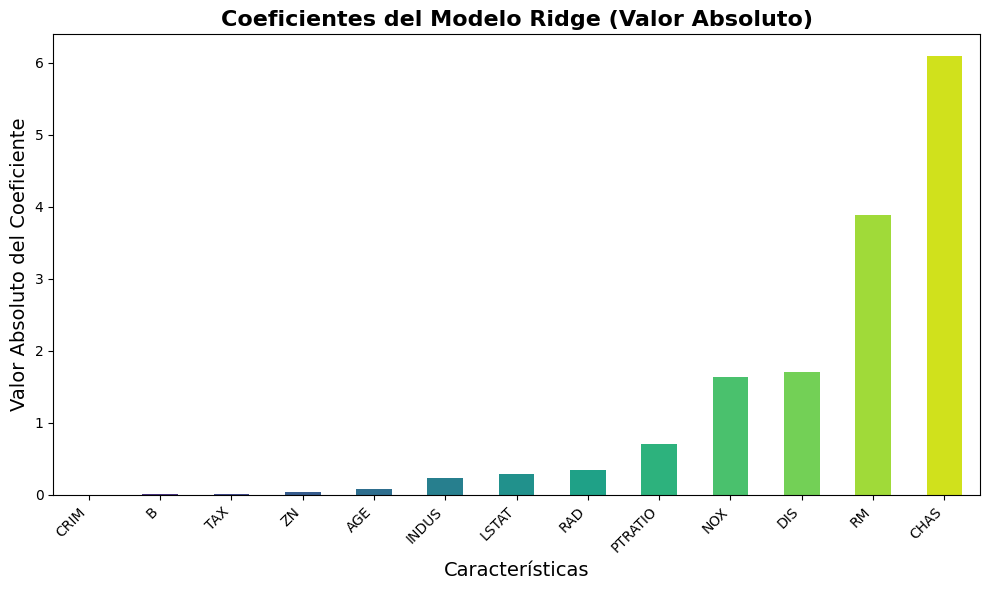

In [5]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=1) # Inicializamos el regresor Ridge con una␣penalización de 1
ridge.fit(X_train, y_train) # Ajustamos el modelo a los datos de entrenamiento
# Extraemos los coeficientes y los ordenamos en función de su valor absoluto
coefs_ridge = pd.Series(np.abs(ridge.coef_), index=features).sort_values(ascending=False)
# Realizamos la predicción en el conjunto de prueba y entrenamiento
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Evaluación del modelo: calculamos el Error Cuadrático Medio (MSE) y el R^2
mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge) # MSE en␣entrenamiento
mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge) # MSE en prueba
r2score_ridge_train = ridge.score(X_train, y_train) # R^2 en entrenamiento
r2score_ridge_test = ridge.score(X_test, y_test) # R^2 en prueba
# Mostramos los resultados:
print('\nIntercepto del modelo:', ridge.intercept_)
print('\nCoeficientes del modelo Ridge:\n', ridge.coef_)
print('\nError Cuadrático Medio (MSE) en entrenamiento:', mse_ridge_train)
print('Error Cuadrático Medio (MSE) en prueba:', mse_ridge_test)
print('\nPuntaje R^2 en entrenamiento:', r2score_ridge_train)
print('Puntaje R^2 en prueba:', r2score_ridge_test)
# Graficamos los coeficientes ordenados por valor absoluto
plt.figure(figsize=(10, 6))
# Ordenar los coeficientes de menor a mayor (invirtiendo el orden)
coefs_ridge.sort_values(ascending=True).plot(kind='bar', color=sns.color_palette("viridis", n_colors=len(coefs_ridge)))

# Añadimos el título y etiquetas a los ejes
plt.title('Coeficientes del Modelo Ridge (Valor Absoluto)', fontsize=16, weight='bold')
plt.xlabel('Características', fontsize=14)
plt.ylabel('Valor Absoluto del Coeficiente', fontsize=14)
# Ajustamos las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')
# Mostramos la gráfica con un diseño ajustado
plt.tight_layout() # Ajuste del espaciado para evitar solapamientos
plt.show()


Intercepto del modelo: 52.92068268504159

Coeficientes del modelo Lasso:
 [-0.          0.05677039 -0.18663206  0.         -0.          0.
 -0.04260378 -1.13153835  0.3759946  -0.01409795 -0.77672856  0.00521161
 -0.56721946]

Error Cuadrático Medio (MSE) en entrenamiento: 28.381490900599587
Error Cuadrático Medio (MSE) en prueba: 33.356838420721296

Puntaje R^2 en entrenamiento: 0.5723614050525907
Puntaje R^2 en prueba: 0.6139202334175015


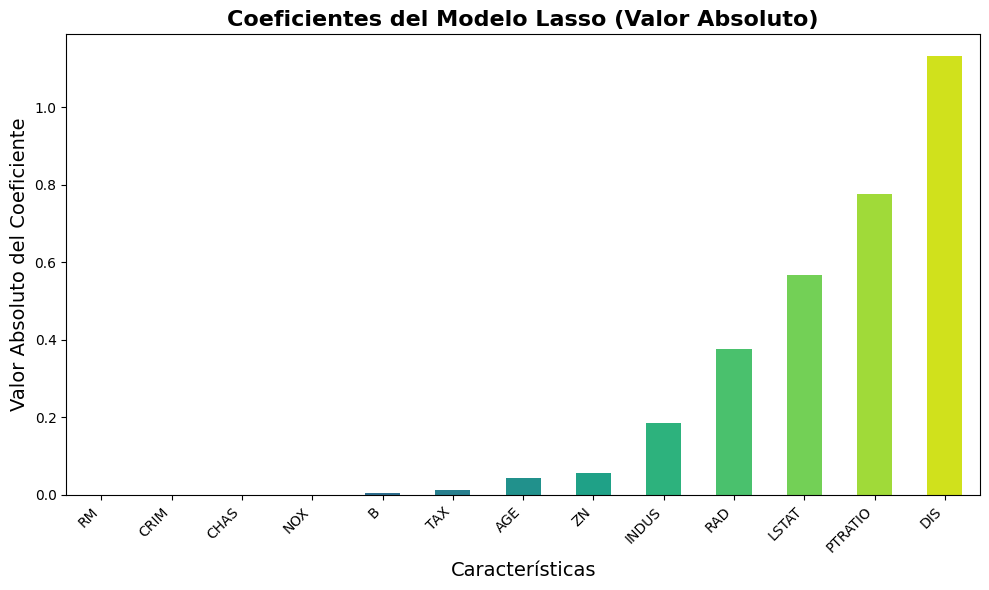

In [6]:
## Regresión Lasso
lasso = linear_model.Lasso(alpha=1) # Inicializamos el regresor Lasso con una␣penalización de 1
lasso.fit(X_train, y_train) # Ajustamos el modelo a los datos de entrenamiento
# Extraemos los coeficientes y los ordenamos en función de su valor absoluto
coefs_lasso = pd.Series(np.abs(lasso.coef_), index=features).sort_values(ascending=False)
# Realizamos la predicción en los conjuntos de entrenamiento y prueba
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
# Evaluación del modelo: calculamos el Error Cuadrático Medio (MSE) y el R^2
mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso) # MSE en␣entrenamiento
mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso) # MSE en prueba
r2score_lasso_train = lasso.score(X_train, y_train) # R^2 en entrenamiento
r2score_lasso_test = lasso.score(X_test, y_test) # R^2 en prueba
# Mostramos los resultados:
print('\nIntercepto del modelo:', lasso.intercept_) # Imprimir el intercepto del modelo Lasso
print('\nCoeficientes del modelo Lasso:\n', lasso.coef_) # Imprimir los coeficientes del modelo Lasso
print('\nError Cuadrático Medio (MSE) en entrenamiento:', mse_lasso_train)
print('Error Cuadrático Medio (MSE) en prueba:', mse_lasso_test)
print('\nPuntaje R^2 en entrenamiento:', r2score_lasso_train)
print('Puntaje R^2 en prueba:', r2score_lasso_test)
# Graficamos los coeficientes ordenados por valor absoluto
plt.figure(figsize=(10, 6))
# Ordenar los coeficientes de menor a mayor (invirtiendo el orden)
coefs_lasso.sort_values(ascending=True).plot(kind='bar', color=sns.color_palette("viridis", n_colors=len(coefs_lasso)))
# Añadimos el título y etiquetas a los ejes
plt.title('Coeficientes del Modelo Lasso (Valor Absoluto)', fontsize=16, weight='bold')
plt.xlabel('Características', fontsize=14)
plt.ylabel('Valor Absoluto del Coeficiente', fontsize=14)
# Ajustamos las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')
# Mostramos la gráfica con un diseño ajustado
plt.tight_layout() # Ajuste del espaciado para evitar solapamientos
plt.show()

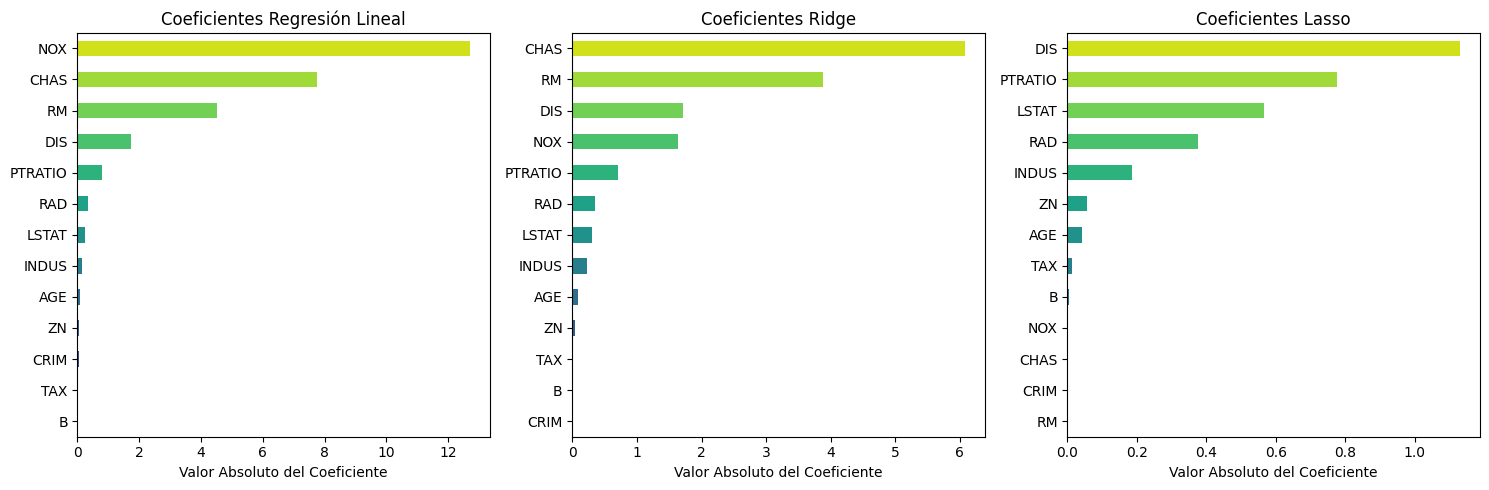

In [7]:
# Crear una figura de tamaño adecuado para visualizar los coeficientes
f = plt.figure(figsize=(15,5))
# Agregar los subgráficos
ax1 = f.add_subplot(131) # Primer gráfico para los coeficientes de la regresión lineal
ax2 = f.add_subplot(132) # Segundo gráfico para los coeficientes de Ridge
ax3 = f.add_subplot(133) # Tercer gráfico para los coeficientes de Lasso

# Graficar los coeficientes de cada modelo utilizando barras horizontales, ordenados de manera ascendente (menor a mayor)
coefs_lr.sort_values(ascending=True).plot(kind="barh", title='Coeficientes Regresión Lineal', ax=ax1, color=sns.color_palette("viridis", n_colors=len(coefs_lr)))
# Coeficientes del modelo de regresión lineal
coefs_ridge.sort_values(ascending=True).plot(kind="barh", title='Coeficientes Ridge', ax=ax2, color=sns.color_palette("viridis", n_colors=len(coefs_ridge)))
# Coeficientes del modelo Ridge
coefs_lasso.sort_values(ascending=True).plot(kind="barh", title='Coeficientes Lasso', ax=ax3, color=sns.color_palette("viridis", n_colors=len(coefs_lasso)))
# Coeficientes del modelo Lasso
# Establecer etiquetas del eje X para cada gráfico
ax1.set_xlabel('Valor Absoluto del Coeficiente') # Etiqueta del eje X para el gráfico de regresión lineal
ax2.set_xlabel('Valor Absoluto del Coeficiente') # Etiqueta del eje X para el gráfico de Ridge
ax3.set_xlabel('Valor Absoluto del Coeficiente') # Etiqueta del eje X para el gráfico de Lasso
# Ajustar el espaciado entre los gráficos para que no se superpongan
plt.tight_layout()
# Mostrar la figura con los tres gráficos comparativos
plt.show()